In [ ]:
## GaS Cell and Simulation: (Paper)


In [1]:
import abtem
import ase.io
import matplotlib.pyplot as plt
import numpy as np
import py4DSTEM
from ase.io import read
from ase.build import surface
from abtem.atoms import pretty_print_transform
# Uncomment if running in Jupyter
%matplotlib ipympl

cupyx.jit.rawkernel is experimental. The interface can change in the future.


Text(0.5, 0.98, 'sapphire_cell')

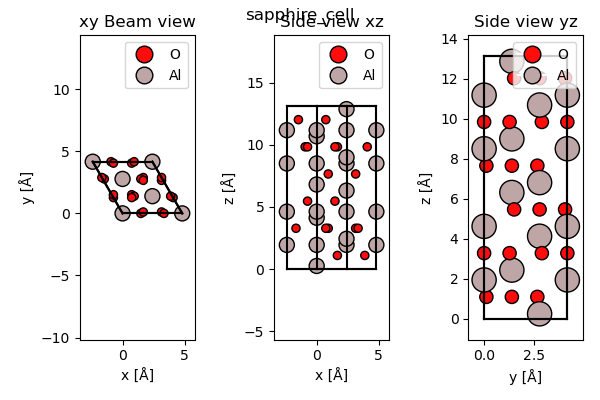

In [2]:
#load sapphire
sapphire_cell = ase.io.read('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/Al2O3.cif')

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(sapphire_cell, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(sapphire_cell, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(sapphire_cell, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('sapphire_cell')

In [4]:
sapphire_cell.cell.lengths()

array([ 4.80502722,  4.80502722, 13.11625325])

Text(0.5, 0.98, 'GaS_cell')

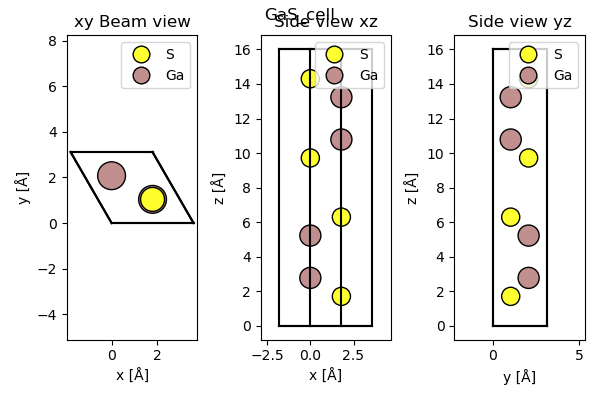

In [5]:
#load GaS
GaS_cell = ase.io.read('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS.cif')

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(GaS_cell, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(GaS_cell, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(GaS_cell, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('GaS_cell')

Text(0.5, 0.98, 'sapphire_cell_100')

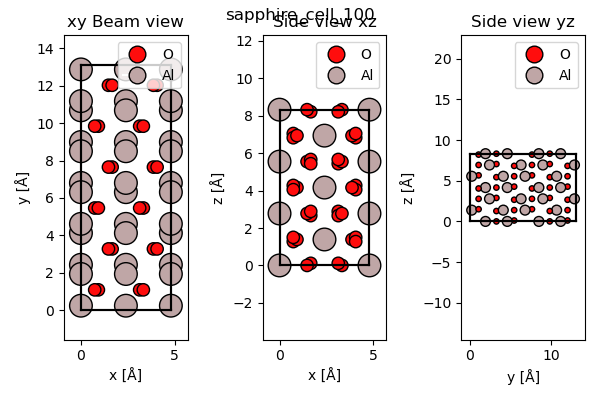

In [6]:
#change to the correct zone axis
sapphire_cell_100 = ase.build.surface(sapphire_cell, indices=(1, 0, 0), layers=2, periodic=True)
sapphire_cell_100.translate((0, sapphire_cell_100.cell.lengths()[1] / 2, 0))
sapphire_cell_100.wrap()

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(sapphire_cell_100, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(sapphire_cell_100, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(sapphire_cell_100, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('sapphire_cell_100')


In [17]:
# Determine slice thickess from cell dimensions
sliceThicknessZ = sapphire_cell_100.cell.lengths()[2]/7
sliceThicknessZ

1.1889358966844914

Text(0.5, 0.98, 'GaS_cell_2_10')

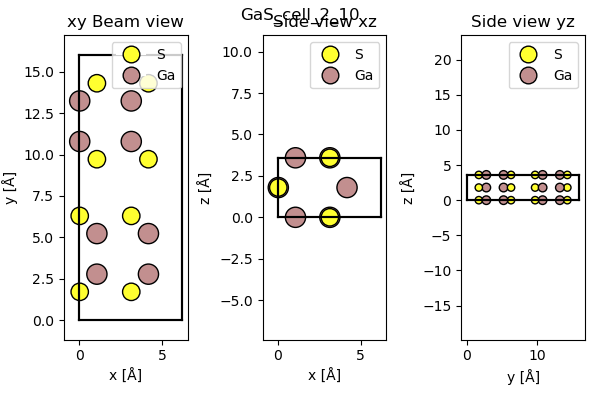

In [18]:
#change to the correct zone axis
GaS_cell_2_10 = ase.build.surface(GaS_cell, indices=(2, -1, 0), layers=2, periodic=True)
GaS_cell_2_10.translate((-1, GaS_cell_2_10.cell.lengths()[1] / 2, 0))
GaS_cell_2_10.wrap()

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(GaS_cell_2_10, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(GaS_cell_2_10, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(GaS_cell_2_10, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('GaS_cell_2_10')

In [19]:
#close to 4/5 ratio --> use for x,z --> fixed to 4/4 match STEM image
x_stretch_factor = sapphire_cell_100.cell.lengths()[0]/GaS_cell_2_10.cell.lengths()[0]
print(x_stretch_factor)

#closest 2.5 --> 5/2 ratio --> fixed to 6/2 to have same strain in other direction - other idea elongation for compensation
z_stretch_factor = sapphire_cell_100.cell.lengths()[2]/GaS_cell_2_10.cell.lengths()[2]
print(z_stretch_factor)

0.7720547685674719
2.3161643057024164


Text(0.5, 0.98, 'repeated_GaS_cell_2_10')

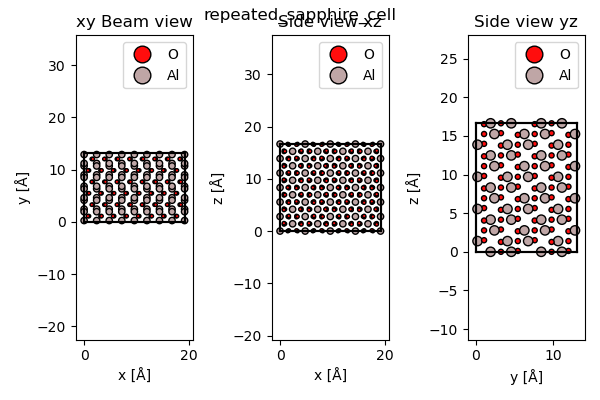

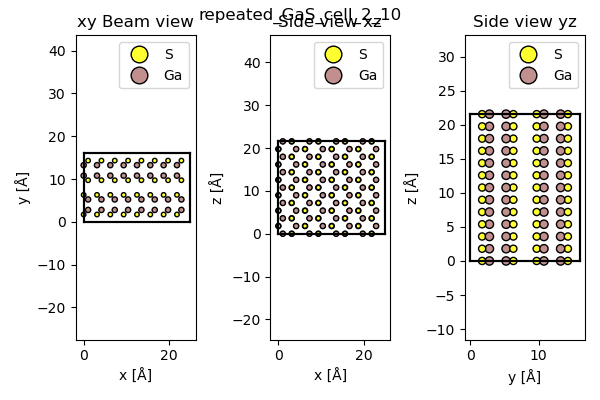

In [20]:
#repeat the cell as much as needed
repeated_sapphire_cell = sapphire_cell_100*(4,1,2)
repeated_GaS_cell_2_10 = GaS_cell_2_10*(4,1,6)

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(repeated_sapphire_cell, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(repeated_sapphire_cell, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(repeated_sapphire_cell, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('repeated_sapphire_cell')

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(repeated_GaS_cell_2_10, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('repeated_GaS_cell_2_10')


0.8007327995000001
0.6162800000000002


Text(0.5, 0.98, 'repeated_GaS_cell_2_10_cutted')

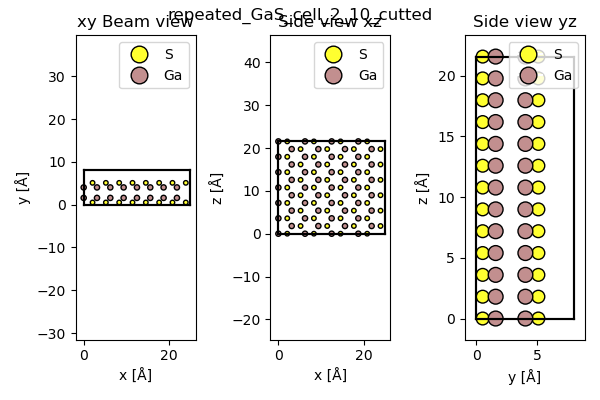

In [21]:
#cut GaS cell - we only need a ML
repeated_GaS_cell_2_10_cutted = repeated_GaS_cell_2_10.copy()

# mask = repeated_GaS_cell_2_10_cutted.positions[:, 1] < repeated_GaS_cell_2_10_cutted.cell.lengths()[1]/2
mask = repeated_GaS_cell_2_10_cutted.positions[:, 1] > repeated_GaS_cell_2_10_cutted.cell.lengths()[1]/2
# deletion *requires* providing the indices, i.e. boolean indexing does not work
del repeated_GaS_cell_2_10_cutted[np.where(mask)[0]]

#translate cell
# repeated_GaS_cell_2_10_cutted.translate((0, -repeated_GaS_cell_2_10_cutted.cell.lengths()[1] / 2, 0))
# repeated_GaS_cell_2_10_cutted.translate((-1.046018333333333, -repeated_GaS_cell_2_10_cutted.cell.lengths()[1] / 20, 0))
print(repeated_GaS_cell_2_10_cutted.cell.lengths()[1] / 20)
print((3.11628-2.5))
repeated_GaS_cell_2_10_cutted.translate((-1.046018333333333, -1.2, 0))

#set new cell boundaries
repeated_GaS_cell_2_10_cutted.set_cell(repeated_GaS_cell_2_10_cutted.cell.lengths()/[1, 2, 1])

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(repeated_GaS_cell_2_10_cutted, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10_cutted, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10_cutted, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('repeated_GaS_cell_2_10_cutted')


Text(0.5, 0.98, 'repeated_sapphire_cell_with_Ga_layer')

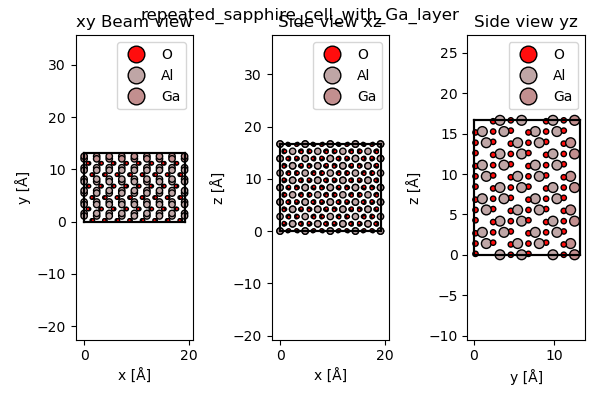

In [22]:
#modify first Al layer of sapphire
repeated_sapphire_cell_with_Ga_layer = repeated_sapphire_cell.copy()

#need translation
repeated_sapphire_cell_with_Ga_layer.translate((0, repeated_sapphire_cell_with_Ga_layer.cell.lengths()[1] / 10, 0))
repeated_sapphire_cell_with_Ga_layer.wrap()

#mask al atoms
mask_al = repeated_sapphire_cell_with_Ga_layer.numbers == 13

#select only first al layer
mask_al_first_layer = repeated_sapphire_cell_with_Ga_layer.positions[:, 1] > repeated_sapphire_cell_with_Ga_layer.cell.lengths()[1] - repeated_sapphire_cell_with_Ga_layer.cell.lengths()[1]/7

#combine
mask_al_combined = mask_al*mask_al_first_layer

#assign new atomic number
repeated_sapphire_cell_with_Ga_layer.numbers[mask_al_combined] = 31

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(repeated_sapphire_cell_with_Ga_layer, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(repeated_sapphire_cell_with_Ga_layer, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(repeated_sapphire_cell_with_Ga_layer, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('repeated_sapphire_cell_with_Ga_layer')

In [27]:
########## heterostructure
GaS_on_sapphire = ase.build.stack(repeated_sapphire_cell_with_Ga_layer,repeated_GaS_cell_2_10_cutted, axis = 1, maxstrain=100)

#make thick in z direction
# GaS_on_sapphire = GaS_on_sapphire*(1,1,50)
GaS_on_sapphire = GaS_on_sapphire*(1,1,10)

#add vacuum on top and bottom

GaS_on_sapphire.center(axis=2, vacuum=5*sliceThicknessZ)

#add vacuum on in y direction
GaS_on_sapphire.center(axis=1, vacuum=5*sliceThicknessZ)

print(GaS_on_sapphire.cell.lengths())


[ 22.05742842  29.88315238 202.78245506]


Text(0.5, 0.98, 'GaS_on_sapphire_z_cut')

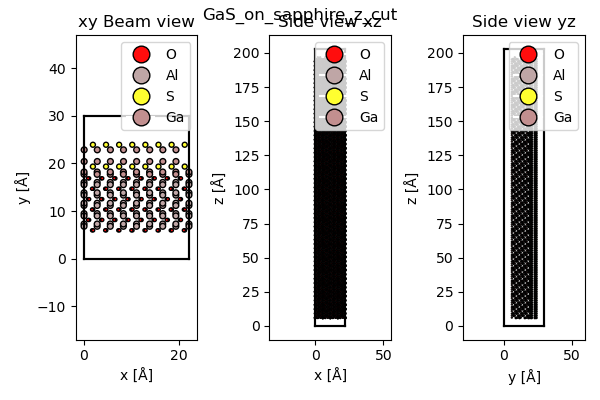

In [28]:
# delete part to create thinner GaS film

#modify first Al layer of sapphire
GaS_on_sapphire_z_cut = GaS_on_sapphire.copy()

## cut part of GaS layer
# # mask = repeated_GaS_cell_2_10_cutted.positions[:, 1] < repeated_GaS_cell_2_10_cutted.cell.lengths()[1]/2
# mask1 = GaS_on_sapphire_z_cut.positions[:, 2] < GaS_on_sapphire_z_cut.cell.lengths()[2]/2
# mask2 = GaS_on_sapphire_z_cut.positions[:, 1] > GaS_on_sapphire_z_cut.cell.lengths()[1]/1.6
# mask = mask1*mask2

# # deletion *requires* providing the indices, i.e. boolean indexing does not work
# del GaS_on_sapphire_z_cut[np.where(mask)[0]]

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(GaS_on_sapphire_z_cut, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(GaS_on_sapphire_z_cut, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(GaS_on_sapphire_z_cut, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('GaS_on_sapphire_z_cut')



In [29]:
#cutted
#export the cell to cif and x,y,z file
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_GaS_cut_angstrom.cif',GaS_on_sapphire_z_cut)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_GaS_cut_angstrom.xyz',GaS_on_sapphire_z_cut)
print("Atom Structure saved")
# #convert A to nm
GaS_on_sapphire_z_cut.positions = GaS_on_sapphire_z_cut.positions/10
GaS_on_sapphire_z_cut.cell = GaS_on_sapphire_z_cut.cell/10

ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_GaS_cut.cif',GaS_on_sapphire_z_cut)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_GaS_cut.xyz',GaS_on_sapphire_z_cut)
print("Atom Structure saved")

Occupancies present but no occupancy info for "{symbol}"
Occupancies present but no occupancy info for "{symbol}"


Atom Structure saved
Atom Structure saved


Text(0.5, 0.98, 'GaS_on_sapphire full structure')

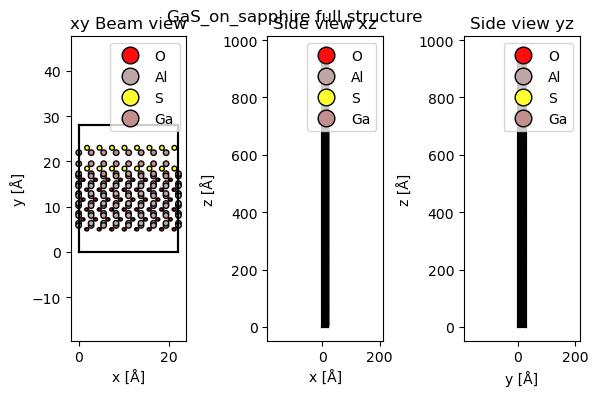

In [14]:
#check cell
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(GaS_on_sapphire, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(GaS_on_sapphire, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(GaS_on_sapphire, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)
fig.tight_layout()
fig.suptitle('GaS_on_sapphire full structure')

In [70]:
#export the cell to cif and x,y,z file
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_angstrom.cif',GaS_on_sapphire)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_angstrom.xyz',GaS_on_sapphire)
print("Atom Structure saved")



Atom Structure saved


Occupancies present but no occupancy info for "{symbol}"


In [11]:
## export sapphir cell for Plasmon Simulations

ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/CIF_Files/sapphire_cell_100.cif',sapphire_cell_100)

In [71]:
#export the cell to cif and x,y,z file - nm

# #convert A to nm
GaS_on_sapphire.positions = GaS_on_sapphire.positions/10
GaS_on_sapphire.cell = GaS_on_sapphire.cell/10

ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_nm.cif',GaS_on_sapphire)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_nm.xyz',GaS_on_sapphire)
print("Atom Structure saved")

Atom Structure saved


Occupancies present but no occupancy info for "{symbol}"


Text(0.5, 0.98, 'repeated_GaS_cell_2_10_cutted')

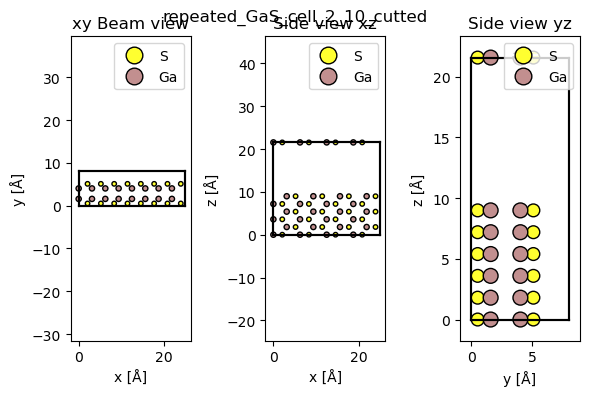

In [13]:
#reduce Thickness of GaS - 1/2
repeated_GaS_cell_2_10_cutted_z = repeated_GaS_cell_2_10_cutted.copy()

# mask = repeated_GaS_cell_2_10_cutted.positions[:, 1] < repeated_GaS_cell_2_10_cutted.cell.lengths()[1]/2
mask = repeated_GaS_cell_2_10_cutted_z.positions[:, 2] > repeated_GaS_cell_2_10_cutted_z.cell.lengths()[2]/2 -1
# deletion *requires* providing the indices, i.e. boolean indexing does not work
del repeated_GaS_cell_2_10_cutted_z[np.where(mask)[0]]

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('repeated_GaS_cell_2_10_cutted')

[ 22.05742842  27.99379342 964.98483036]


Text(0.5, 0.98, 'GaS_on_sapphire full structure')

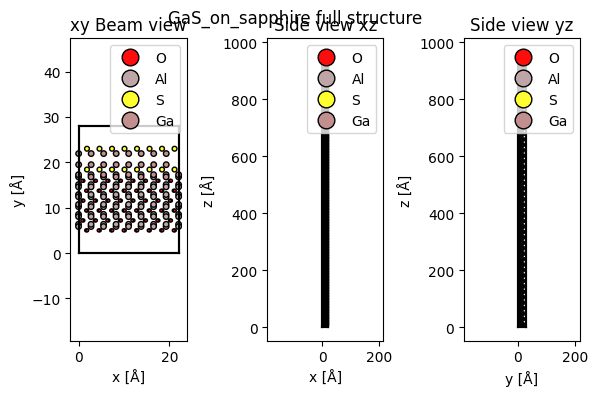

In [95]:
########## heterostructure - z cut
GaS_on_sapphire = ase.build.stack(repeated_sapphire_cell_with_Ga_layer,repeated_GaS_cell_2_10_cutted_z, axis = 1, maxstrain=100)

#make thick in z direction
GaS_on_sapphire = GaS_on_sapphire*(1,1,50)

#add vacuum on top and bottom

GaS_on_sapphire.center(axis=2, vacuum=5)

#add vacuum on in y direction
GaS_on_sapphire.center(axis=1, vacuum=5)

print(GaS_on_sapphire.cell.lengths())

#check cell
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(GaS_on_sapphire, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(GaS_on_sapphire, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(GaS_on_sapphire, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)
fig.tight_layout()
fig.suptitle('GaS_on_sapphire full structure')


In [96]:
#cutted
#export the cell to cif and x,y,z file
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_angstrom.cif',GaS_on_sapphire)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_angstrom.xyz',GaS_on_sapphire)
print("Atom Structure saved")
# #convert A to nm
GaS_on_sapphire.positions = GaS_on_sapphire.positions/10
GaS_on_sapphire.cell = GaS_on_sapphire.cell/10

ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_nm.cif',GaS_on_sapphire)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_nm.xyz',GaS_on_sapphire)
print("Atom Structure saved")

Occupancies present but no occupancy info for "{symbol}"


Atom Structure saved
Atom Structure saved


Occupancies present but no occupancy info for "{symbol}"


Text(0.5, 0.98, 'repeated_GaS_cell_2_10_cutted')

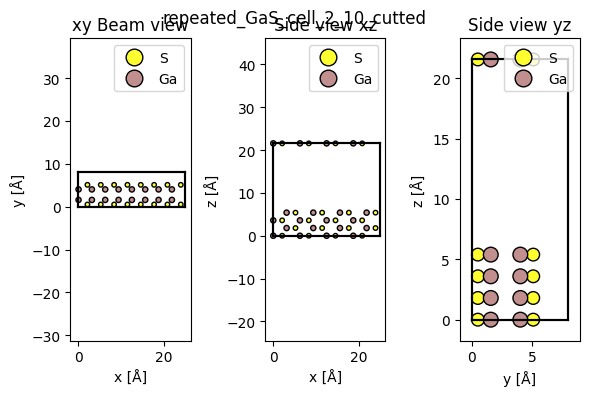

In [97]:
# Thickness: 1/3 of sapphire
#reduce Thickness of GaS
repeated_GaS_cell_2_10_cutted_z = repeated_GaS_cell_2_10_cutted.copy()

# mask = repeated_GaS_cell_2_10_cutted.positions[:, 1] < repeated_GaS_cell_2_10_cutted.cell.lengths()[1]/2
mask = repeated_GaS_cell_2_10_cutted_z.positions[:, 2] > repeated_GaS_cell_2_10_cutted_z.cell.lengths()[2]/3 -1
# deletion *requires* providing the indices, i.e. boolean indexing does not work
del repeated_GaS_cell_2_10_cutted_z[np.where(mask)[0]]

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('repeated_GaS_cell_2_10_cutted')


[ 22.05742842  27.99379342 964.98483036]


Text(0.5, 0.98, 'GaS_on_sapphire full structure')

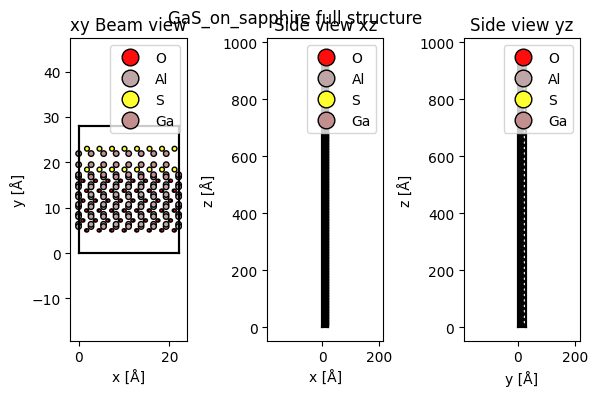

In [98]:
########## heterostructure - z cut
GaS_on_sapphire = ase.build.stack(repeated_sapphire_cell_with_Ga_layer,repeated_GaS_cell_2_10_cutted_z, axis = 1, maxstrain=100)

#make thick in z direction
GaS_on_sapphire = GaS_on_sapphire*(1,1,50)

#add vacuum on top and bottom

GaS_on_sapphire.center(axis=2, vacuum=5)

#add vacuum on in y direction
GaS_on_sapphire.center(axis=1, vacuum=5)

print(GaS_on_sapphire.cell.lengths())

#check cell
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(GaS_on_sapphire, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(GaS_on_sapphire, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(GaS_on_sapphire, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)
fig.tight_layout()
fig.suptitle('GaS_on_sapphire full structure')

In [99]:
#cutted
#export the cell to cif and x,y,z file
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_1_3_angstrom.cif',GaS_on_sapphire)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_1_3_angstrom.xyz',GaS_on_sapphire)
print("Atom Structure saved")
# #convert A to nm
GaS_on_sapphire.positions = GaS_on_sapphire.positions/10
GaS_on_sapphire.cell = GaS_on_sapphire.cell/10

ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_1_3_nm.cif',GaS_on_sapphire)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_1_3_nm.xyz',GaS_on_sapphire)
print("Atom Structure saved")

Occupancies present but no occupancy info for "{symbol}"
Occupancies present but no occupancy info for "{symbol}"


Atom Structure saved
Atom Structure saved


Text(0.5, 0.98, 'repeated_GaS_cell_2_10_cutted')

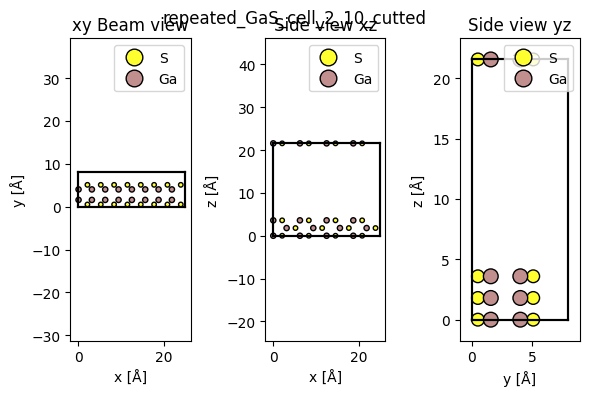

In [100]:
# Thickness: 1/4 of sapphire
#reduce Thickness of GaS
repeated_GaS_cell_2_10_cutted_z = repeated_GaS_cell_2_10_cutted.copy()

# mask = repeated_GaS_cell_2_10_cutted.positions[:, 1] < repeated_GaS_cell_2_10_cutted.cell.lengths()[1]/2
mask = repeated_GaS_cell_2_10_cutted_z.positions[:, 2] > repeated_GaS_cell_2_10_cutted_z.cell.lengths()[2]/4 -1
# deletion *requires* providing the indices, i.e. boolean indexing does not work
del repeated_GaS_cell_2_10_cutted_z[np.where(mask)[0]]

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(repeated_GaS_cell_2_10_cutted_z, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('repeated_GaS_cell_2_10_cutted')

[ 22.05742842  27.99379342 964.98483036]


Text(0.5, 0.98, 'GaS_on_sapphire full structure')

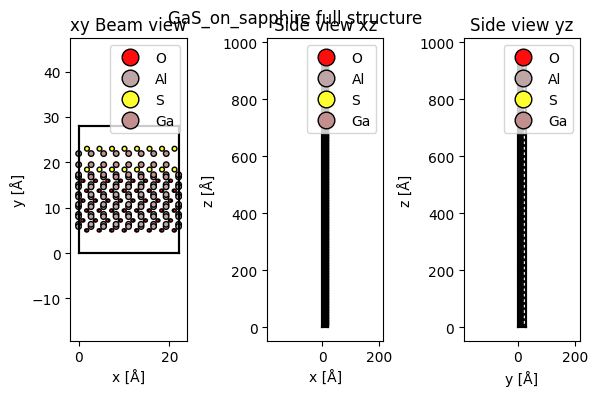

In [101]:
########## heterostructure - z cut
GaS_on_sapphire = ase.build.stack(repeated_sapphire_cell_with_Ga_layer,repeated_GaS_cell_2_10_cutted_z, axis = 1, maxstrain=100)

#make thick in z direction
GaS_on_sapphire = GaS_on_sapphire*(1,1,50)

#add vacuum on top and bottom

GaS_on_sapphire.center(axis=2, vacuum=5)

#add vacuum on in y direction
GaS_on_sapphire.center(axis=1, vacuum=5)

print(GaS_on_sapphire.cell.lengths())

#check cell
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(GaS_on_sapphire, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(GaS_on_sapphire, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(GaS_on_sapphire, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)
fig.tight_layout()
fig.suptitle('GaS_on_sapphire full structure')

In [102]:
#cutted
#export the cell to cif and x,y,z file
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_1_4_angstrom.cif',GaS_on_sapphire)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_1_4_angstrom.xyz',GaS_on_sapphire)
print("Atom Structure saved")
# #convert A to nm
GaS_on_sapphire.positions = GaS_on_sapphire.positions/10
GaS_on_sapphire.cell = GaS_on_sapphire.cell/10

ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_1_4_nm.cif',GaS_on_sapphire)
ase.io.write('/masc_shared/ag_volz/Oliver_Maßmeyer/TEM_Simulations/GaS_on_Sapphire_cross_section/CIF_Files/GaS_on_sapphire_optimized_z_cut_1_4_nm.xyz',GaS_on_sapphire)
print("Atom Structure saved")

Occupancies present but no occupancy info for "{symbol}"
Occupancies present but no occupancy info for "{symbol}"


Atom Structure saved
Atom Structure saved
